In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn

# Práctica 4: Overfitting

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado se llama LDPA y puede leer su descripción en la siguiente liga

https://www.openml.org/d/1483

In [3]:
# Descarga la metadata del dataset
dataset_info = openml.datasets.get_dataset(1483, download_data=False)

# Obtiene el nombre de la columna a predecir
target = dataset_info.default_target_attribute

(
    features, # Dataframe con las características que se pueden utilizar para predecir
    outputs, # Columna a predecir
    categorical_mask, # Máscara que indica que columnas de todas las características son categoricas
    columns # Lista con el nombre de las características
)= dataset_info.get_data(
    dataset_format="dataframe", target=target
)

categorical_mask = np.array(categorical_mask)
columns = np.array(columns)

In [4]:
print(f"La columna a predecir se llama '{target}'")
print(f"Todas las características son {str(columns)}")
print(f"Las características categóricas son {str(columns[categorical_mask])}")
print(f"Las características numéricas son {str(columns[~categorical_mask])}")

La columna a predecir se llama 'Class'
Todas las características son ['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7']
Las características categóricas son ['V1' 'V2']
Las características numéricas son ['V3' 'V4' 'V5' 'V6' 'V7']


In [5]:
# Impresión de las características
features

,V1,V2,V3,V4,V5,V6,V7
0,1,1,105794.0,105777.0,148933.0,108479.0,109365.0
1,1,4,105795.0,105778.0,155325.0,96952.0,161363.0
2,1,3,105796.0,105779.0,156652.0,101610.0,148870.0
3,1,1,105797.0,105780.0,149736.0,107135.0,102479.0
4,1,2,105798.0,105781.0,155978.0,125455.0,106203.0
...,...,...,...,...,...,...,...
164855,5,2,43687.0,43679.0,106611.0,123166.0,12432.0
164856,5,1,43688.0,43680.0,120821.0,119848.0,87463.0
164857,5,4,43689.0,43681.0,104999.0,110823.0,161536.0
164858,5,2,43690.0,43682.0,102191.0,112520.0,10811.0


In [6]:
outputs

0         3
1         3
2         3
3         3
4         3
         ..
164855    3
164856    3
164857    3
164858    3
164859    3
Name: Class, Length: 164860, dtype: category
Categories (11, object): ['1' < '2' < '3' < '4' ... '8' < '9' < '10' < '11']

A continuación se realiza la partición de __train__ y __test__. __No debe utilizar la partición de test por ningún motivo__.

In [7]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    features, 
    outputs, 
    test_size=0.5, 
    random_state=11
)

## Asignación 1 &#x1F921;

Utilizando las técnicas vistas en clase, realicé su mejor esfuerzo para obtener el mejor modelo lineal posible utilizando __únicamente el conjunto de entrenamiento__ (X_train y y_train). Puede utilizar bibliotecas, pero únicamente las técnicas vistas en clase y debe ir generando métricas o visualizaciones que respalden su toma de decisiones. Debe tener e imprimir una estimación de $E_{out}$ utilizando su conjunto de entrenamiento. La métrica utilizada será la entropía cruzada.

##### Data set Information:

People used for recording of the data were of the data were wearing four tags (ankle left, angle right, belt and chest). Each instance is a localization data for one of the tags. The tag can be identified by one of the attributes.

##### Attribute Information:
Instance Example: 
A01,020-000-033-111,633790226057226795,27.05.2009 14:03:25:723,4.292500972747803,2.0738532543182373,1.36650812625885,walking

1. Sequence Name {A01,A02,A03,A04,A05,B01,B02,B03,B04,B05,C01,C02,C03,C04,C05,D01,D02,D03,D04,D05,E01,E02,E03,E04,E05} (Nominal)
    - A, B, C, D, E = 5 people

2. Tag identificator {010-000-024-033,020-000-033-111,020-000-032-221,010-000-030-096} (Nominal)
    - ANKLE_LEFT = 010-000-024-033
    - ANKLE_RIGHT = 010-000-030-096
    - CHEST = 020-000-033-111
    - BELT = 020-000-032-221

3. timestamp (Numeric) all unique
4. date FORMAT = dd.MM.yyyy HH:mm:ss:SSS (Date)
5. x coordinate of the tag (Numeric)
6. y coordinate of the tag (Numeric)
7. z coordinate of the tag (Numeric)
8. activity {walking,falling,'lying down',lying,'sitting down',sitting,'standing up from lying','on all fours','sitting on the ground','standing up from sitting','standing up from sitting on the ground'} (Nominal)

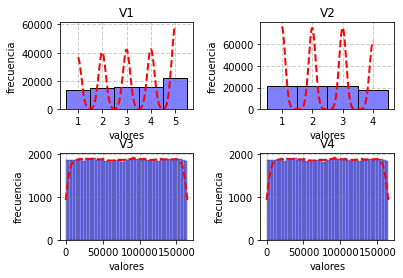

In [8]:
fig1 = plt.figure("Filtro")
fig1.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(1, 5):
    # p, q = filtro(p, q)

    ax = fig1.add_subplot(2, 2, i)
    # ax.plot(p,q,"g--")
    sns.histplot(x=X_train.iloc[:, i-1], kde=True, line_kws={'linestyle' : 'dashed',
                                                    'linewidth' : '2'}, color='blue').lines[0].set_color('red')
    ax.set_xlabel("valores")
    ax.set_ylabel("frecuencia")
    ax.set_title("{}".format(X_train.columns[i-1]))
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    # Pintar los ejes pasando por (0,0)
    ax.axhline(0, color='black', linewidth=0.5)

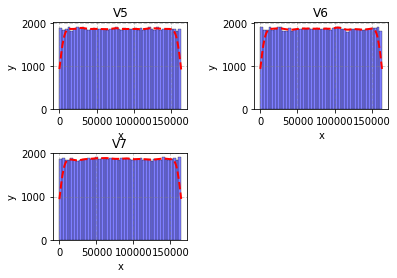

In [9]:
# Creamos otra figura, se mostrar
fig2 = plt.figure("n ** i")
fig2.subplots_adjust(hspace=0.5, wspace=0.5)

# x = list(range(1, 10))
for i in range(4, 7):
    # y = npotencia(x, i)
    ax = fig2.add_subplot(2, 2, i-3)
    # ax.plot(x, y, "r-.")
    sns.histplot(x=X_train.iloc[:, i], kde=True, line_kws={'linestyle' : 'dashed',
                                                    'linewidth' : '2'}, color='blue').lines[0].set_color('red')
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("{}".format(X_train.columns[i]))
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    ax.axhline(0, color='black', linewidth=0.5)

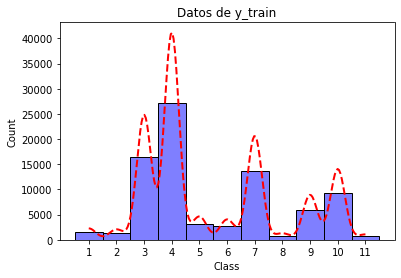

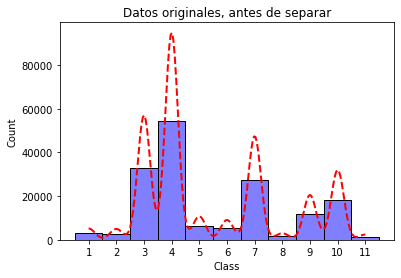

In [10]:
plt.figure()
# Comprobamos las clases de la variable a predecir
sns.histplot(x=y_train, kde=True, line_kws={'linestyle' : 'dashed',
                                                    'linewidth' : '2'}, color='blue').lines[0].set_color('red')
plt.title(f'Datos de y_train')
plt.show()

plt.figure()
sns.histplot(x=outputs, kde=True, line_kws={'linestyle' : 'dashed',
                                                    'linewidth' : '2'}, color='blue',).lines[0].set_color('red')
plt.title(f'Datos originales, antes de separar')
plt.show()

Como se puede ver las clases estan mal proporcionados, por lo que no sería bueno seguir, pero escalamos los datos(-1.5, 1.5), después de comprobar la distribución de los valores

In [11]:
# Removemos las variables categoricas
aux = X_train.drop(['V1', 'V2'], axis='columns')

# Normalizamos los datos
x_medias = aux.mean(axis=0)
x_stds = aux.std(axis=0)

# Creamos el dataset escalado
x_norm = (aux - x_medias) / x_stds

# Creamos el dataset nuevo, agregando las columnas que se eliminaron anteriormente
x_norm.insert(0, 'V1', X_train.V1.values)
x_norm.insert(1, 'V2', X_train.V2.values)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
# Creamos el modelo y lo entrenamos
clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42, multi_class='multinomial').fit(x_norm, y_train)

# Predecimos la probabilidad de que ocurra un valor
valor_predicho = clf.predict_proba(x_norm.values)

print('Valor de entropia cruzada:', sklearn.metrics.log_loss(y_test, valor_predicho, labels=clf.classes_))

d:\Users\rod_e\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Valor de entropia cruzada: 2.795157512457548


Visualizamos una matrix de confusión ya que es multiclase nuestro dataset

d:\Users\rod_e\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


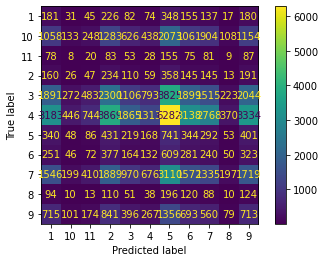

In [17]:
cm = sklearn.metrics.confusion_matrix(y_test, clf.predict(x_norm.values), labels=clf.classes_)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_).plot()

In [20]:
print('Accuracy_score: ', sklearn.metrics.accuracy_score(y_test, clf.predict(x_norm.values), normalize = True))

Accuracy_score:  0.07360184398883901


d:\Users\rod_e\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
print('Precision: ', sklearn.metrics.precision_score(y_test, clf.predict(x_norm.values), average=None))

d:\Users\rod_e\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Precision:  [0.01905865 0.10075758 0.00853971 0.02009791 0.19602978 0.32940291
 0.03889151 0.02963197 0.16553007 0.0088574  0.06942551]


## Asignación 2 &#x1F921;

Evalue su modelo final en el conjunto de test (X_test y y_test). Su práctica será evaluada acorde a las técnicas aplicadas, la estimación de $E_{out}$, el valor de $E_{test}$, y contra las métricas obtenidas por sus compañeros.